In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
%matplotlib inline

In [23]:
# Load the dataset
df = pd.read_csv('fitness_class_2212.csv')  # Replace with your file path

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (1500, 8)

First 5 Rows:


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [24]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [25]:
# Preprocessing
# Encode categorical variables using label encoding, feel free to try one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [26]:
# Handle missing values
# Option 1: Drop rows with missing values
#df = df.dropna()

# Option 2: Impute missing values (uncomment below if you prefer imputation)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [27]:
#Assignment: Perform Exploratory Data Analysis
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   float64
 1   months_as_member  1500 non-null   float64
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   float64
 4   day_of_week       1500 non-null   float64
 5   time              1500 non-null   float64
 6   category          1500 non-null   float64
 7   attended          1500 non-null   float64
dtypes: float64(8)
memory usage: 93.9 KB


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.610378,13.270000,4.092667,0.239333,2.957333,0.302667
std,433.157015,12.926543,12.680411,9.409718,2.667988,0.426819,1.022518,0.459565
min,1.000000,1.000000,55.410000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,375.750000,8.000000,73.562500,5.000000,2.000000,0.000000,2.000000,0.000000
50%,750.500000,12.000000,81.035000,14.000000,5.000000,0.000000,3.000000,0.000000
75%,1125.250000,19.000000,89.382500,20.000000,6.000000,0.000000,3.000000,1.000000
max,1500.000000,148.000000,170.520000,30.000000,9.000000,1.000000,5.000000,1.000000


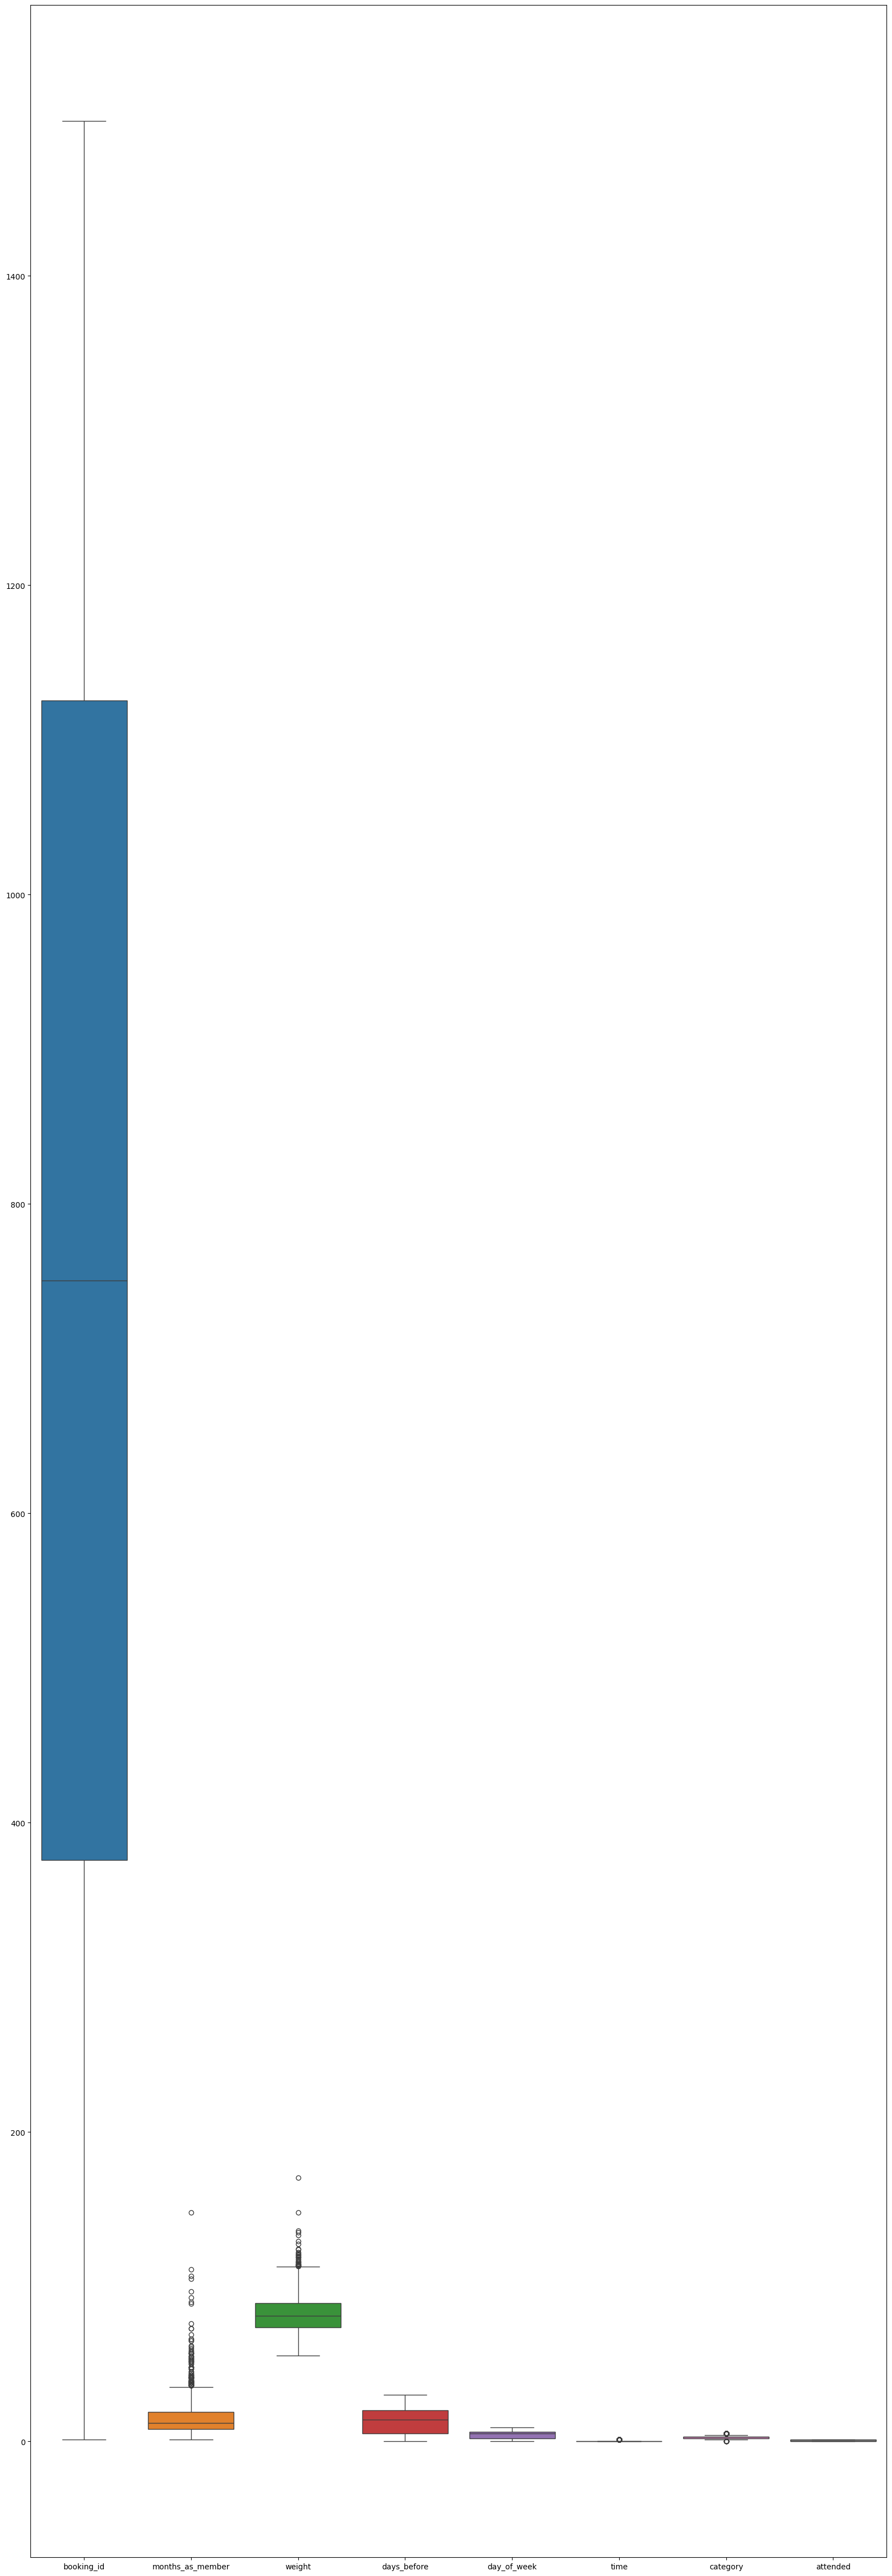

In [28]:
plt.figure(figsize=(20, 60))
sns.boxplot(data=df)
plt.show()

In [29]:
# Split features and target
X = df.drop('attended', axis=1)  # Replace 'Attendance' with your target column name
y = df['attended']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
#Balancing the Dataset (SMOTE: Oversampling using imblearn library)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [32]:
#Logistic Regression 
lr_balanced = LogisticRegression(random_state=42)
lr_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_lr_balanced = lr_balanced.predict(X_test)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [33]:
print("\nLogistic Regression Performance (With Balancing):")
print(classification_report(y_test, y_pred_lr_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_balanced))


Logistic Regression Performance (With Balancing):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       293
         1.0       0.35      1.00      0.52       157

    accuracy                           0.35       450
   macro avg       0.17      0.50      0.26       450
weighted avg       0.12      0.35      0.18       450

Confusion Matrix:
[[  0 293]
 [  0 157]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
#Random Forest
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_rf_balanced = rf_balanced.predict(X_test)

print("\nRandom Forest Performance (With Balancing):")
print(classification_report(y_test, y_pred_rf_balanced))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_balanced))


Random Forest Performance (With Balancing):
              precision    recall  f1-score   support

         0.0       0.65      0.97      0.78       293
         1.0       0.20      0.01      0.02       157

    accuracy                           0.64       450
   macro avg       0.42      0.49      0.40       450
weighted avg       0.49      0.64      0.51       450

Confusion Matrix:
[[285   8]
 [155   2]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [35]:
#Hyperparameter Tuning (Random Forest)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_balanced, y_train_balanced)

print("\nBest Parameters for Random Forest:")
print(grid_search_rf.best_params_)

# Evaluate tuned Random Forest
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nTuned Random Forest Performance:")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))


Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Tuned Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.65      0.97      0.78       293
         1.0       0.20      0.01      0.02       157

    accuracy                           0.64       450
   macro avg       0.42      0.49      0.40       450
weighted avg       0.49      0.64      0.51       450

Confusion Matrix:
[[285   8]
 [155   2]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [36]:
#Cross-Validation (Random Forest)
cv_scores_rf = cross_val_score(best_rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())


Random Forest Cross-Validation Scores: [0.79470199 0.79069767 0.84717608 0.85049834 0.8372093 ]
Mean CV Accuracy: 0.8240566764207606


In [37]:
#Gradient Boosting Trees (GBT)
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train_balanced, y_train_balanced)
y_pred_gbt = gbt.predict(X_test)

print("\nGradient Boosting Trees Performance:")
print(classification_report(y_test, y_pred_gbt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbt))


Gradient Boosting Trees Performance:
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79       293
         1.0       0.00      0.00      0.00       157

    accuracy                           0.65       450
   macro avg       0.33      0.50      0.39       450
weighted avg       0.42      0.65      0.51       450

Confusion Matrix:
[[292   1]
 [157   0]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [38]:
#Assignment: 
#1.Fine-Tune the Hyper-Parameters for Logistic Regression and GBT model
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
gridsearch_lr =GridSearchCV(lr_balanced, param_grid, cv=5)
gridsearch_lr.fit(X_train_balanced, y_train_balanced)
best_cv_lr = gridsearch_lr.best_estimator_
lr_y_pred = best_cv_lr.predict(X_test)
print("\nTuned Logistic Regression Performance:")
print(classification_report(y_test, lr_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_pred))
cv_scores_rf = cross_val_score(best_rf, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean CV Accuracy:", cv_scores_rf.mean())





C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5200 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = 


Tuned Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       293
         1.0       0.35      1.00      0.52       157

    accuracy                           0.35       450
   macro avg       0.17      0.50      0.26       450
weighted avg       0.12      0.35      0.18       450

Confusion Matrix:
[[  0 293]
 [  0 157]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Cross-Validation Scores: [0.79470199 0.79069767 0.84717608 0.85049834 0.8372093 ]
Mean CV Accuracy: 0.8240566764207606


In [39]:
cv_scores_lr = cross_val_score(best_cv_lr, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Scores:", cv_scores_lr)
print("Mean CV Accuracy:", cv_scores_lr.mean())


Logistic Regression Cross-Validation Scores: [0.77483444 0.72757475 0.74750831 0.75415282 0.74086379]
Mean CV Accuracy: 0.7489868209720358


In [40]:
parameters = {#'nthread':[3,4], #when use hyperthread, xgboost may become slower
               "criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.05,0.1,1,0.5], #so called `eta` value
              'max_depth': [3,4,5],
              'min_samples_leaf': [4,5,6],

              'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,15,20],#number of trees, change it to 1000 for better results
              

              }
gridsearch_gbt =GridSearchCV(gbt, param_grid=parameters, cv=5)
gridsearch_gbt.fit(X_train_balanced, y_train_balanced)
best_cv_gbt = gridsearch_lr.best_estimator_
gbt_y_pred = best_cv_lr.predict(X_test)
print("\nTuned Gradient Boosting Performance:")
print(classification_report(y_test, gbt_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, gbt_y_pred))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
16200 fits failed out of a total of 21600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packag


Tuned Gradient Boosting Performance:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       293
         1.0       0.35      1.00      0.52       157

    accuracy                           0.35       450
   macro avg       0.17      0.50      0.26       450
weighted avg       0.12      0.35      0.18       450


Confusion Matrix:
[[  0 293]
 [  0 157]]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Us

In [41]:
cv_scores_gbt = cross_val_score(best_cv_gbt, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
print("\nGradient Boosting Cross-Validation Scores:", cv_scores_gbt)
print("Mean CV Accuracy:", cv_scores_gbt.mean())


Gradient Boosting Cross-Validation Scores: [0.77483444 0.72757475 0.74750831 0.75415282 0.74086379]
Mean CV Accuracy: 0.7489868209720358


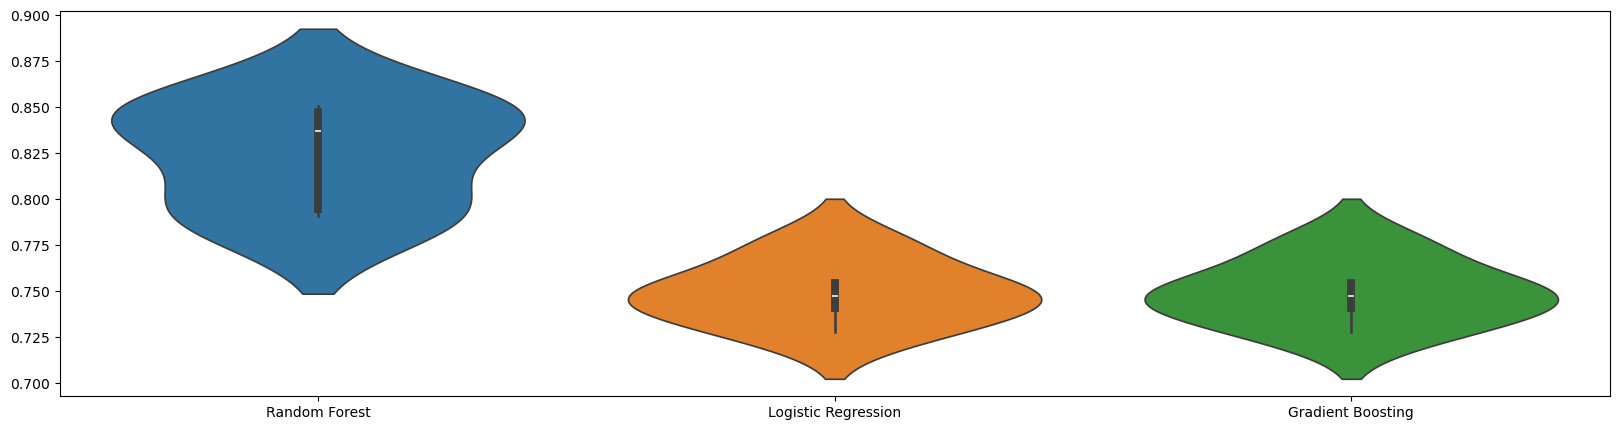

In [44]:
#2.Use other plots to compare model performance
accuracy_dict = {'Random Forest': cv_scores_rf, 'Logistic Regression': cv_scores_lr, 'Gradient Boosting': cv_scores_gbt}
df_acc = pd.DataFrame(accuracy_dict)

plt.figure(figsize=(20, 5))
sns.violinplot(data=df_acc)
plt.show()

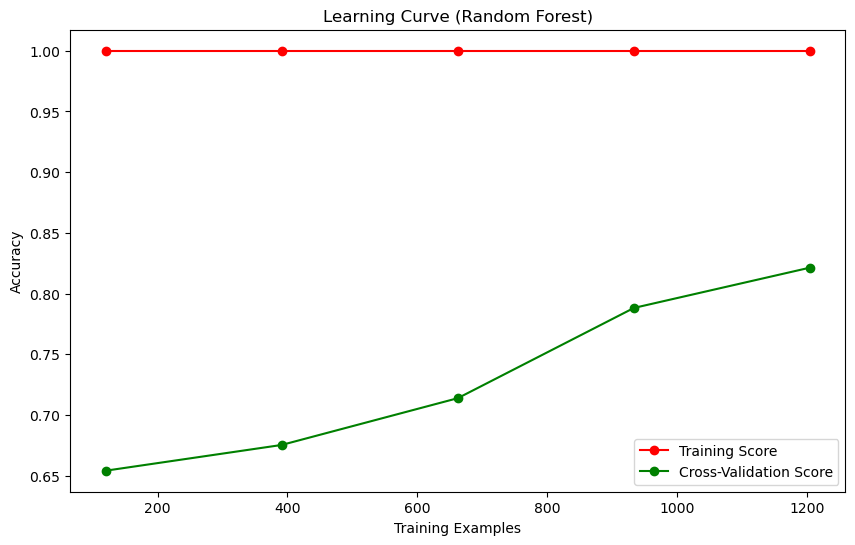

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1276, in fit
    self.coef_, self

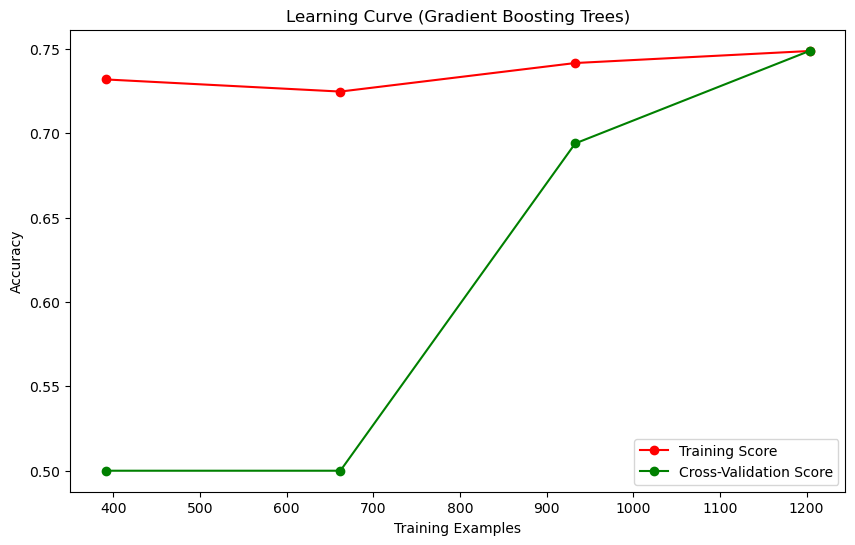

C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1276, in fit
    self.coef_, self

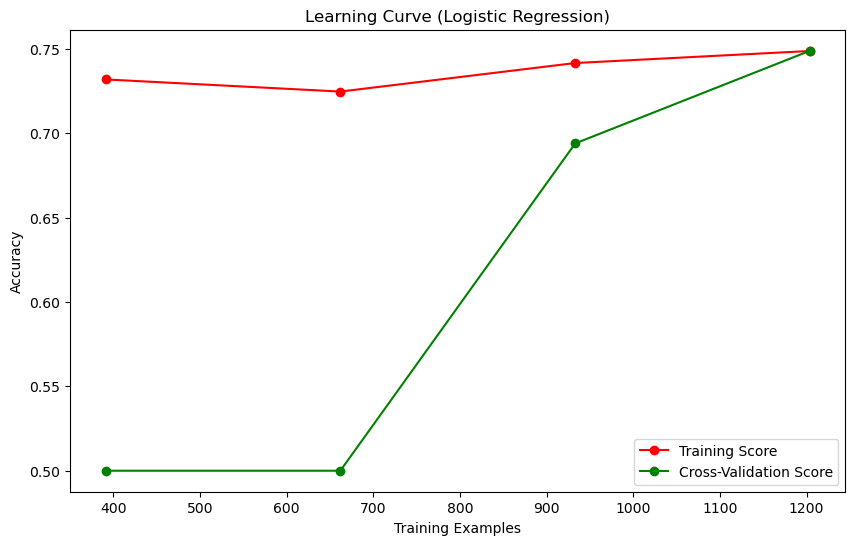

In [45]:
#Bias-Variance Tradeoff (Learning Curves)
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend(loc="best")
    plt.show()

# Plot learning curve for Random Forest
plot_learning_curve(best_rf, "Learning Curve (Random Forest)", X_train_balanced, y_train_balanced)

# Plot learning curve for Gradient Boosting Trees
plot_learning_curve(best_cv_gbt, "Learning Curve (Gradient Boosting Trees)", X_train_balanced, y_train_balanced)

# Plot learning curve for Logistic Regression 
plot_learning_curve(best_cv_lr, "Learning Curve (Logistic Regression)", X_train_balanced, y_train_balanced)